In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs 
import statsmodels.api as sm
import docx
import plotly.express as px

C:\Users\first\AppData\Local\Temp\ipykernel_28116\332718299.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
filepath = '../Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars.dropna(inplace=True)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mean_and_median_per_country = cars.groupby('origin').agg({'mpg': ['mean', 'median', 'std'], 'displacement': ['mean', 'median', 'std'], 'horsepower': ['mean', 'median', 'std'], 'weight': ['mean', 'median', 'std'], 'acceleration': ['mean', 'median', 'std']})
mean_and_median_per_country


mpg                  displacement                    horsepower  \
             mean median       std         mean median        std        mean   
origin                                                                          
europe  27.602941   26.0  6.580182   109.632353  105.0  22.693220   80.558824   
japan   30.450633   31.6  6.090048   102.708861   97.0  23.140126   79.835443   
usa     20.033469   18.5  6.440384   247.512245  250.0  98.376347  119.048980   

                               weight                     acceleration         \
       median        std         mean  median         std         mean median   
origin                                                                          
europe   76.5  20.157871  2433.470588  2240.0  491.813867    16.794118   15.6   
japan    75.0  17.819199  2221.227848  2155.0  320.497248    16.172152   16.4   
usa     105.0  39.897790  3372.489796  3381.0  795.346690    14.990204   15.0   

                  
             std  
origin            
europe  3.087813  
japan   1.954937  
usa     2.736020

In [5]:
# open an existing document
doc = docx.Document()

# add a table to the end and create a reference variable
# extra row is so we can add the header row
table = doc.add_table(mean_and_median_per_country.shape[0]+1, mean_and_median_per_country.shape[1])

# add the header rows.
for i in range(mean_and_median_per_country.shape[-1]):
    table.cell(0,i).text = mean_and_median_per_country.columns[i]

# add the rest of the data frame
for i in range(mean_and_median_per_country.shape[0]):
    for j in range(mean_and_median_per_country.shape[-1]):
        table.cell(i+1,j).text = str(mean_and_median_per_country.values[i,j])

# save the doc
doc.save('table 1.docx')

In [6]:
# Perform the aggregation
median_per_year = cars.groupby('model_year').agg({'mpg': ['mean', 'median', 'std'], 'displacement': ['mean', 'median', 'std'], 'horsepower': ['mean', 'median', 'std'], 'weight': ['mean', 'median', 'std'], 'acceleration': ['mean', 'median', 'std']})
median_per_year.reset_index(inplace=True)
median_per_year

model_year        mpg                  displacement                     \
                    mean median       std         mean median         std   
0          70  17.689655  16.00  5.339231   281.413793  307.0  124.421380   
1          71  21.111111  19.00  6.675635   213.888889  232.0  115.152185   
2          72  18.714286  18.50  5.435529   218.375000  131.0  123.781964   
3          73  17.100000  16.00  4.700245   256.875000  276.0  121.722085   
4          74  22.769231  24.50  6.537937   170.653846  121.0   94.259193   
5          75  20.266667  19.50  4.940566   205.533333  228.0   87.669730   
6          76  21.573529  21.00  5.889297   197.794118  184.0   94.422256   
7          77  23.375000  21.75  6.675862   191.392857  143.0  107.813742   
8          78  24.061111  20.70  6.898044   177.805556  159.5   76.012713   
9          79  25.093103  23.90  6.794217   206.689655  183.0   96.307581   
10         80  33.803704  32.70  6.885854   116.074074  107.0   34.164676   
11         81  30.185714  31.15  5.635319   136.571429  119.5   59.055798   
12         82  32.000000  32.00  5.232524   128.133333  115.5   39.806197   

    horsepower                         weight                       \
          mean median        std         mean  median          std   
0   147.827586  150.0  53.734844  3372.793103  3449.0   852.868663   
1   107.037037   95.0  38.566109  3030.592593  2962.0  1065.314842   
2   120.178571  104.5  41.121368  3237.714286  2956.0   974.520960   
3   130.475000  129.5  46.412304  3419.025000  3338.5   974.809133   
4    94.230769   88.0  29.686775  2878.038462  2470.0   968.108402   
5   101.066667   97.0  26.577062  3176.800000  3098.5   765.179781   
6   101.117647   93.5  32.430592  3078.735294  3171.5   821.371481   
7   105.071429   97.5  36.095479  2997.357143  2747.5   912.825902   
8    99.694444   97.0  28.436214  2861.805556  2910.0   626.023907   
9   101.206897   90.0  28.455955  3055.344828  3190.0   747.881497   
10   77.481481   75.0  18.173037  2441.592593  2335.0   422.864614   
11   81.035714   75.5  18.105620  2530.178571  2437.5   541.936654   
12   81.466667   84.0  13.296962  2434.166667  2460.0   343.210208   

   acceleration                   
           mean median       std  
0     12.948276  12.50  3.330982  
1     15.000000  14.50  2.605468  
2     15.125000  14.50  2.850032  
3     14.312500  14.00  2.754222  
4     16.173077  16.00  1.714306  
5     16.050000  16.00  2.471737  
6     15.941176  15.50  2.801419  
7     15.435714  15.65  2.273391  
8     15.805556  15.75  2.129915  
9     15.813793  15.00  2.952931  
10    17.018519  16.50  2.885379  
11    16.325000  16.30  2.230533  
12    16.510000  16.30  2.419939

In [7]:
# open an existing document
doc = docx.Document()

# add a table to the end and create a reference variable
# extra row is so we can add the header row
table = doc.add_table(median_per_year.shape[0]+1, median_per_year.shape[1])

# add the header rows.
for i in range(median_per_year.shape[-1]):
    table.cell(0,i).text = median_per_year.columns[i]

# add the rest of the data frame
for i in range(median_per_year.shape[0]):
    for j in range(median_per_year.shape[-1]):
        table.cell(i+1,j).text = str(median_per_year.values[i,j])

# save the doc
doc.save('table 2.docx')

Text(0, 0.5, 'MPG')

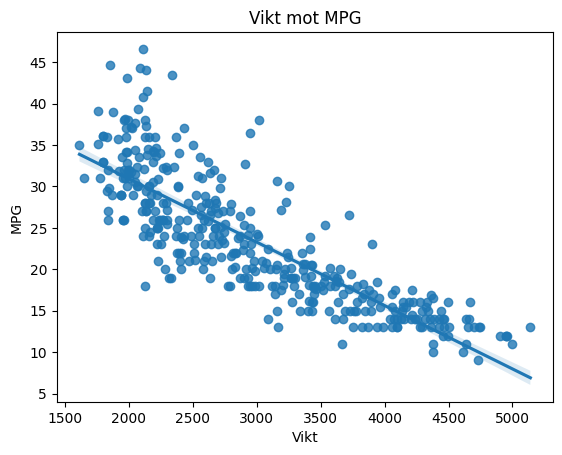

In [15]:
# Scatter plot: weight vs mpg
weight_mpg_plot = sns.regplot(data=cars, x='weight', y='mpg')
weight_mpg_plot.set_title('Vikt mot MPG')
weight_mpg_plot.set_xlabel('Vikt')
weight_mpg_plot.set_ylabel('MPG')

Text(0.5, 1.0, 'Årsmodell Mot MPG Median')

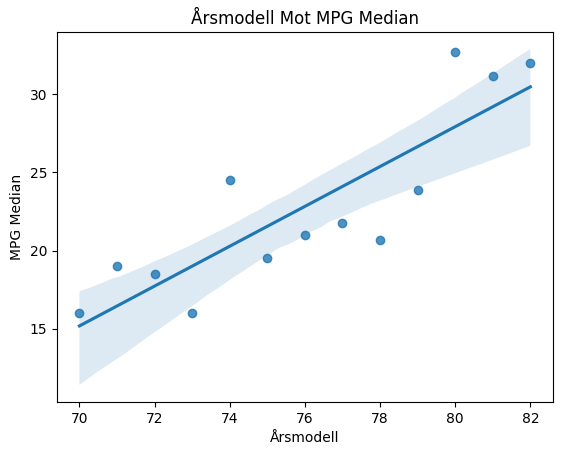

In [14]:
# Scatter plot: model_year vs mpg
mpg_median = median_per_year['mpg']['median']
year_mpg_plot = sns.regplot(data=median_per_year, x='model_year', y=mpg_median)
year_mpg_plot.set_xlabel('Årsmodell')
year_mpg_plot.set_ylabel('MPG Median')
year_mpg_plot.set_title('Årsmodell Mot MPG Median')

Text(0.5, 1.0, 'Årsmodell Mot Vikt Median')

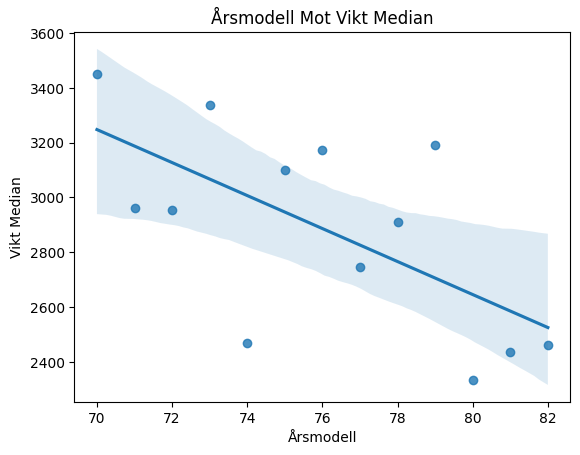

In [13]:
# Scatter plot: model_year vs weight
weight_median = median_per_year['weight']['median']
year_weight_plot = sns.regplot(data=median_per_year, x='model_year', y=weight_median)
year_weight_plot.set_xlabel('Årsmodell')
year_weight_plot.set_ylabel('Vikt Median')
year_weight_plot.set_title('Årsmodell Mot Vikt Median')

Text(0.5, 1.0, 'Årsmodell Mot Motorvolym Median')

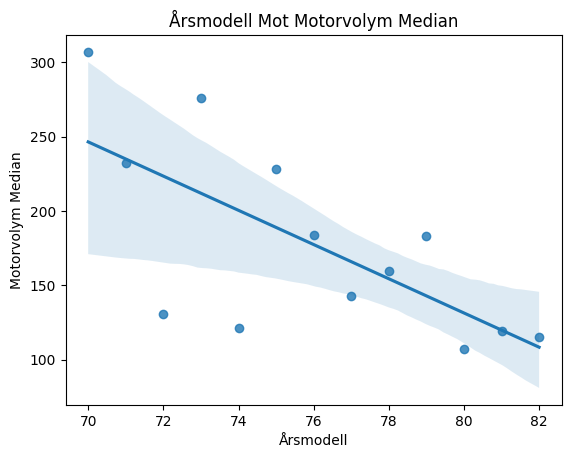

In [11]:
displacement_median = median_per_year['displacement']['median']
year_displacement_plot = sns.regplot(data=median_per_year, x='model_year', y=displacement_median)
year_displacement_plot.set_xlabel('Årsmodell')
year_displacement_plot.set_ylabel('Motorvolym Median')
year_displacement_plot.set_title('Årsmodell Mot Motorvolym Median')

### Confidence interval for european cars

In [23]:
europe = cars[cars['origin'] == 'europe']
n_europe = len(europe['mpg'])

mean_europe = np.mean(europe['mpg'])

alpha = 0.05

sem_europe = scs.sem(europe['mpg'])
lower_europe, upper_europe = scs.t.interval(confidence=1-alpha, df=n_europe-1, loc=mean_europe, scale=sem_europe)

print(f'Confidence interval (\u03B1 = 0.05) for average mpg of european cars: {round(lower_europe, 1)}-{round(upper_europe, 1)}')

Confidence interval (α = 0.05) for average mpg of european cars: 26.0-29.2


### Confidence interval for american cars

In [22]:
usa = cars[cars['origin'] == 'usa']
n_usa = len(usa['mpg'])

mean_usa = np.mean(usa['mpg'])

alpha = 0.05

sem_usa = scs.sem(usa['mpg'])
lower_usa, upper_usa = scs.t.interval(confidence=1-alpha, df=n_usa-1, loc=mean_usa, scale=sem_usa)

print(f'Confidence interval (\u03B1 = 0.05) for average mpg of american cars: {round(lower_usa, 1)}-{round(upper_usa, 1)}')

Confidence interval (α = 0.05) for average mpg of american cars: 19.2-20.8


In [24]:
japan = cars[cars['origin'] == 'japan']
n_japan = len(japan['mpg'])

mean_japan = np.mean(japan['mpg'])

alpha = 0.05

sem_japan = scs.sem(japan['mpg'])
lower_japan, upper_japan = scs.t.interval(confidence=1-alpha, df=n_japan-1, loc=mean_japan, scale=sem_japan)

print(f'Confidence interval (\u03B1 = 0.05) for average mpg of japanese cars: {round(lower_japan, 1)}-{round(upper_japan, 1)}')

Confidence interval (α = 0.05) for average mpg of japanese cars: 29.1-31.8
